In [1]:
import scipy
%matplotlib inline
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
import matplotlib.patches as mpatches
import sys
import os

# Import Refexp python class
# Please MAKE SURE that ./google_refexp_py_lib is in your
# python library search path
sys.path.append("google_refexp_py_lib")
from refexp import Refexp

In [2]:
# Specify datasets path.
refexp_filename='google_refexp_dataset_release/google_refexp_train_201511_coco_aligned.json'
coco_filename='external/coco/annotations/instances_train2014.json'
imagesDir = 'external/coco/images'
imagesType = 'train2014'

# Create Refexp instance.
refexp = Refexp(refexp_filename, coco_filename)

loading annotations into memory...
Done (t=14.03s)
creating index...
index created!
Dataset loaded.


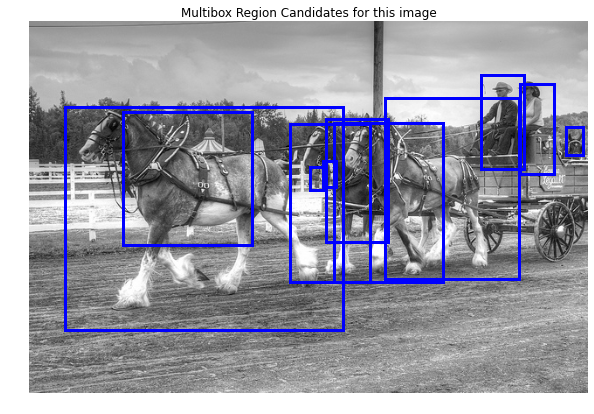

In [14]:
# Get all images that contain all given categories.
catIds = refexp.getCatIds(catNms=['person'])
imgIds = refexp.getImgIds(catIds=catIds)
# Select random image.
random_img_id = imgIds[np.random.randint(0,len(imgIds))]
img = refexp.loadImgs(random_img_id)[0]
# Plot image and all region candidates from multibox detector.
I = io.imread(os.path.join(imagesDir, imagesType, img['file_name']))
plt.figure()
plt.imshow(I)
ax = plt.axis('off')
plt.title('Multibox Region Candidates for this image')
refexp.showRegionCandidates(img)

Referring expressions for the object in the bounding box: 
A lead horse in a three horse team.
lead horse pulling carriage


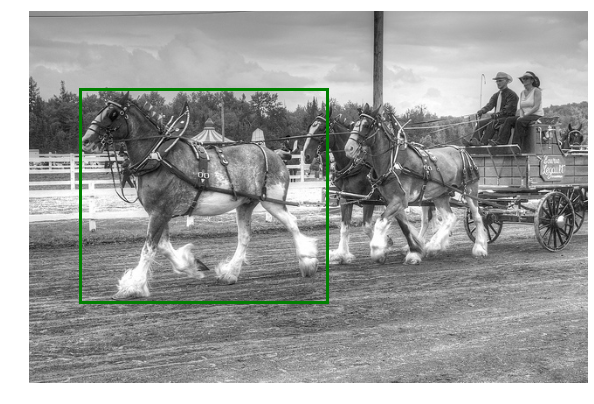

In [15]:
# Plot one annotation for the current image: bbox and referring expressions.
plt.imshow(I)
ax = plt.axis('off')
anns = refexp.getAnnIds(random_img_id)
ann = refexp.loadAnns(anns[0])[0]
refexp.showAnn(ann)

A black man in a black suit.


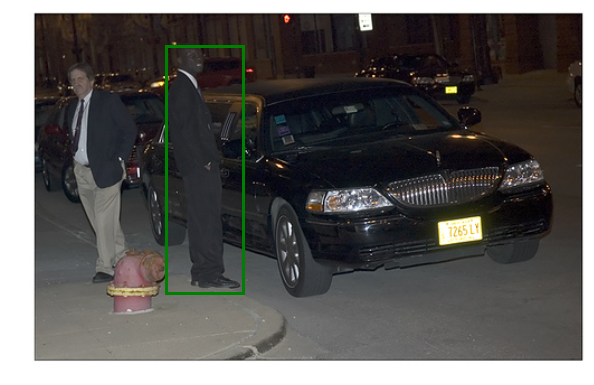

In [16]:
# Get all referring expressions with the given filters.
refexp_ids = refexp.getRefexpIds(tokens=['man'], len_min=4, len_max=7, referent='man', referent_has_attributes=True)
# Display a random one if any.
random_refexp_id = refexp_ids[np.random.randint(0,len(refexp_ids))]
random_refexp = refexp.loadRefexps(random_refexp_id)
print random_refexp[0]['raw']
# Show the associated image.
img_id_for_random_refexp = refexp.getImgIds(refexpIds = random_refexp_id)
img_for_random_refexp = refexp.loadImgs(img_id_for_random_refexp)[0]
I = io.imread('%s/%s/%s'%(imagesDir, imagesType, img_for_random_refexp['file_name']))
plt.figure()
plt.imshow(I)
ax = plt.axis('off')
# Plot the bbox.
ann_id_for_refexp = refexp.getAnnIds(refexpIds=random_refexp_id)[0]
ann_for_refexp = refexp.loadAnns(ann_id_for_refexp)[0]
refexp.showAnn(ann_for_refexp, printRefexps=False)